<a href="https://colab.research.google.com/github/hemanth714444/daup-project-2192/blob/main/netflix_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libs (if not already)
!pip install --quiet tensorflow

# Imports
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Load dataset
df = pd.read_csv('/content/netflix_titles[1].csv')
df.dropna(subset=['description'], inplace=True)

# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

df['cleaned'] = df['description'].apply(preprocess)

            # Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned'])
vocab_size = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences(df['cleaned'])
max_len = 50
padded = pad_sequences(sequences, maxlen=max_len, padding='post')

            # Dummy binary labels (for training)
labels = np.random.randint(0, 2, len(padded))

            # Train/test split
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2)

            # Build the LSTM model (embedding is randomly initialized and learned)
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_len))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

            # Train
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.4939 - loss: 0.6946 - val_accuracy: 0.5011 - val_loss: 0.6933
Epoch 2/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.5018 - loss: 0.6935 - val_accuracy: 0.5011 - val_loss: 0.6931
Epoch 3/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.5047 - loss: 0.6936 - val_accuracy: 0.5011 - val_loss: 0.6932
Epoch 4/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.5003 - loss: 0.6938 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 5/5
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.4999 - loss: 0.6933 - val_accuracy: 0.4989 - val_loss: 0.6934


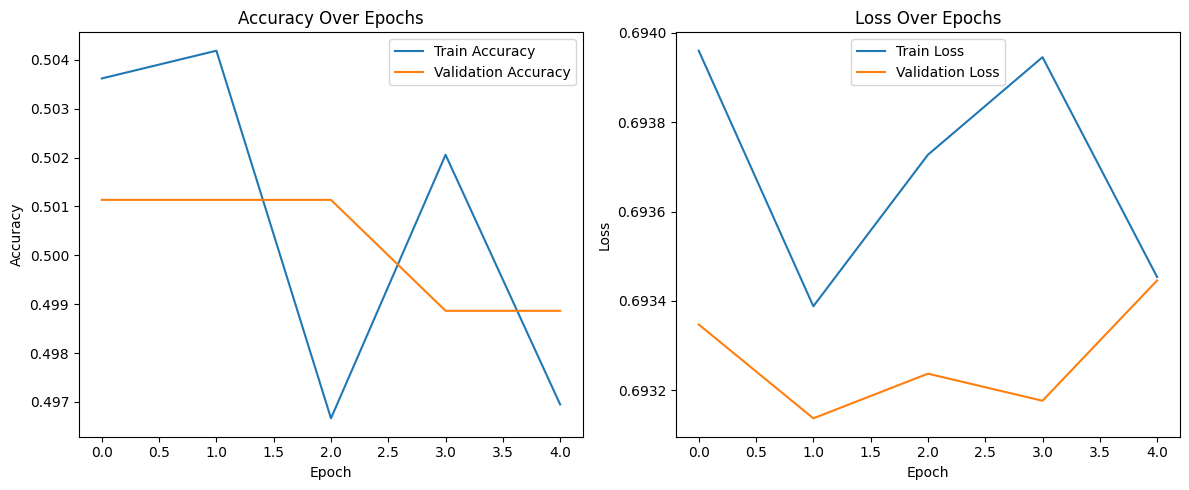

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
